In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tqdm
from sklearn.neural_network import MLPRegressor


ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


In [30]:
date = "JUN15"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1040_GFcat_Phi3Cat_2018.root".format(date))
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

df = df.Define("D0_Gen_pt", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25)[0]")\
    .Define("D0_Gen_phi", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25)[1]")\
    .Define("D0_Gen_eta", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 421, 423, 25)[0]")\
    .Define("D0Star_Gen_pt", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25)[0]")\
    .Define("D0Star_Gen_phi", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25)[1]")\
    .Define("D0Star_Gen_eta", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25)[0]")\
    .Define("Photon_Gen_pt", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)[0]")\
    .Define("Photon_Gen_phi", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)[1]")\
    .Define("Photon_Gen_eta", "getEtaPhi(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)[0]")\
    .Define("DR_Gen", "ROOT::VecOps::DeltaR(D0_Gen_eta, Photon_Gen_eta, D0_Gen_phi, Photon_Gen_phi)")\
    .Define("DR_Reco", "ROOT::VecOps::DeltaR(goodMeson_eta[0], goodPhotons_eta[0], goodMeson_phi[0], goodPhotons_phi[0])")

In [31]:
dfnew = df.Define("Diff_D0_pt", "(goodMeson_pt[0]-D0_Gen_pt)/D0_Gen_pt")\
    .Define("Diff_D0_phi", "(goodMeson_phi[0]-D0_Gen_phi)/D0_Gen_phi")\
    .Define("Diff_D0_eta", "(goodMeson_eta[0]-D0_Gen_eta)/D0_Gen_eta")\
    .Define("Diff_Photon_pt", "(goodPhotons_pt[0]-Photon_Gen_pt)/Photon_Gen_pt")\
    .Define("Diff_Photon_phi", "(goodPhotons_phi[0]-Photon_Gen_phi)/Photon_Gen_phi")\
    .Define("Diff_Photon_eta", "(goodPhotons_eta[0]-Photon_Gen_eta)/Photon_Gen_eta")\
    .Define("Diff_DR", "(DR_Reco-DR_Gen)/DR_Gen")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


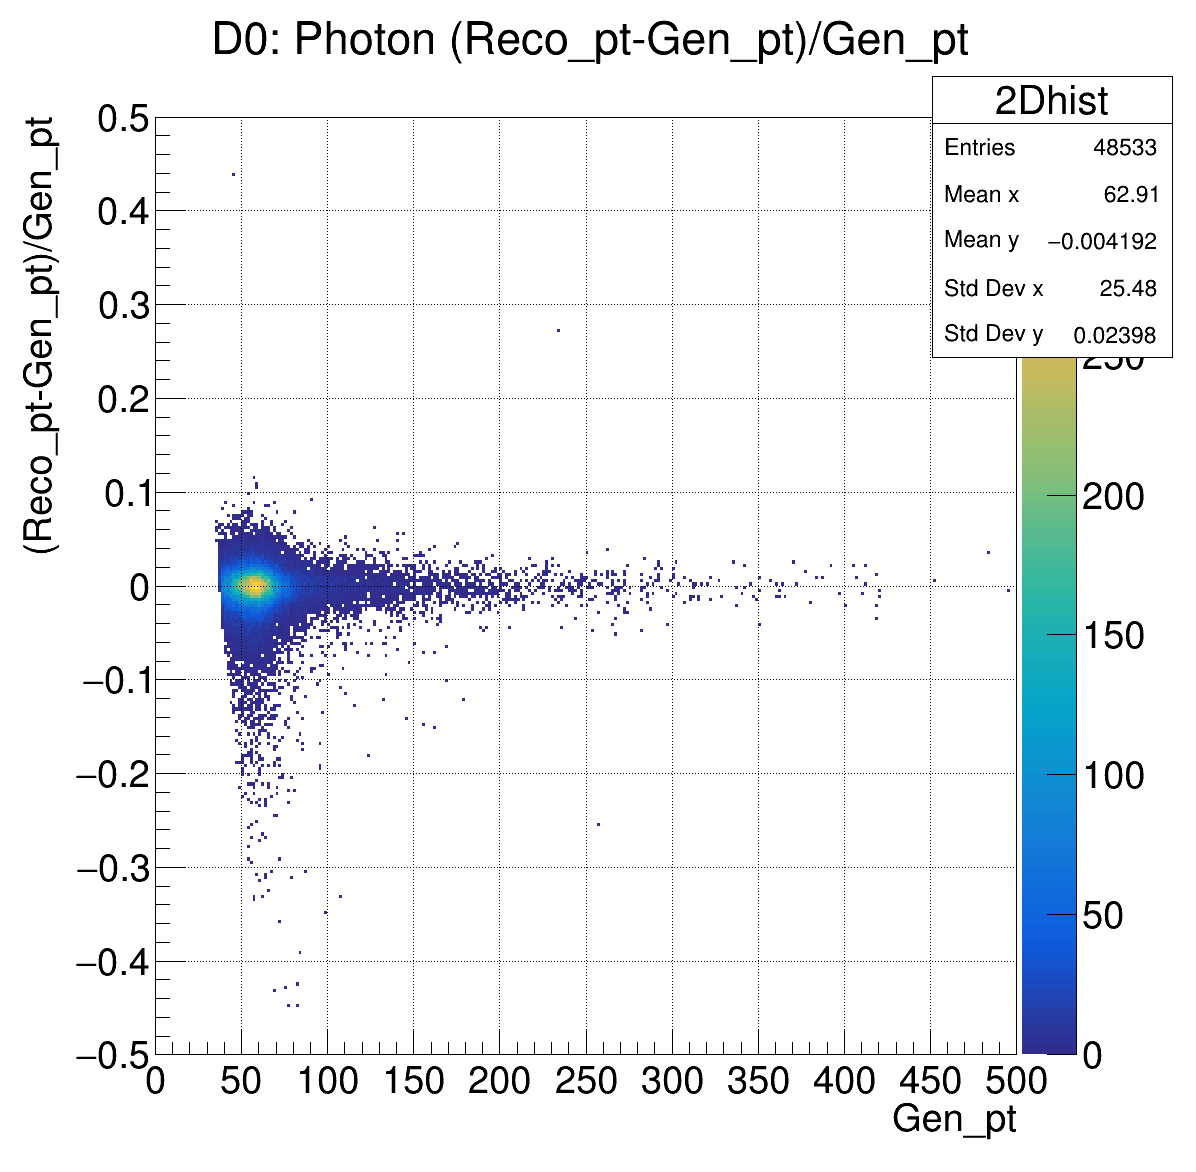

In [32]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh, ylow, yhigh = 300, 0, 500, -0.5, 0.5

var = "pt"
part = "Photon"

h = dfnew.Histo2D(("2Dhist", "D0: {0} (Reco_{1}-Gen_{1})/Gen_{1}".format(part, var),\
                   nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_Gen_{}".format(part, var), "Diff_{}_{}".format(part, var))

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


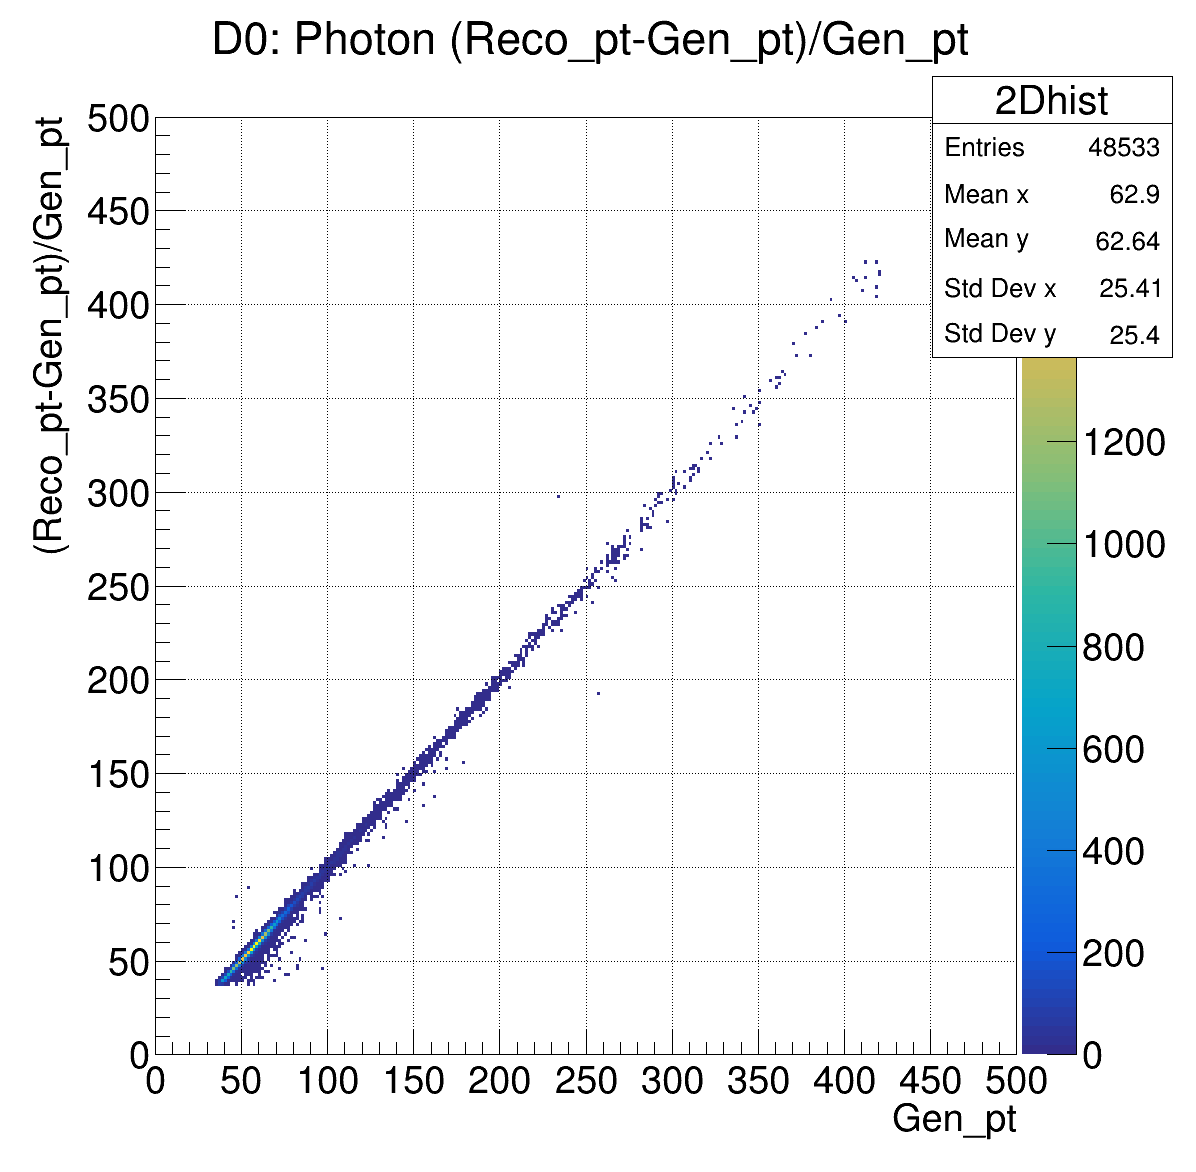

In [35]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh, ylow, yhigh = 300, 0, 500, 0, 500

var = "pt"
part = "Photon"

h = dfnew.Histo2D(("2Dhist", "D0: {0} (Reco_{1}-Gen_{1})/Gen_{1}".format(part, var),\
                   nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_Gen_{}".format(part, var), "goodPhotons_pt")

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

In [36]:
cols = ["Photon_Gen_pt", "goodPhotons_pt", "goodPhotons_phi", "goodPhotons_eta", "goodPhotons_calo_x", "goodPhotons_calo_y", "goodPhotons_calo_z"]
x = dfnew.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)
display(pddf)

,Photon_Gen_pt,goodPhotons_pt,goodPhotons_phi,goodPhotons_eta,goodPhotons_calo_x,goodPhotons_calo_y,goodPhotons_calo_z
0,46.500,[46.59500503540039],[2.91259765625],[0.12249755859375],[-135.625],[31.640625],[20.90625]
1,64.500,[65.14427947998047],[-2.48291015625],[-0.68408203125],[-109.75],[-84.875],[-106.1875]
2,51.125,[51.083560943603516],[-0.531005859375],[-0.8924560546875],[117.9375],[-69.3125],[-139.25]
3,47.375,[47.61848831176758],[-0.880615234375],[1.3515625],[86.0],[-103.8125],[245.75]
4,59.875,[58.52029800415039],[-1.142333984375],[-0.24957275390625],[57.875],[-126.6875],[-33.625]
...,...,...,...,...,...,...,...
48528,68.000,[67.49699401855469],[2.0],[-0.677001953125],[-57.84375],[126.4375],[-97.1875]
48529,46.125,[45.896583557128906],[0.6300048828125],[-0.7078857421875],[112.375],[81.0],[-103.125]
48530,60.375,[60.841670989990234],[0.05773162841796875],[0.007080078125],[139.125],[8.078125],[1.25]
48531,64.750,[64.68799591064453],[-2.25634765625],[-0.420654296875],[-88.125],[-107.75],[-59.0625]


In [ ]:
#Test and prepare the data for training

In [16]:
x1 = pddf["Diff_D0_pt"].to_numpy()
x2 = pddf["D0_Gen_pt"].to_numpy()
print(x2)

[ 77.75   53.75   51.75  ...  56.125  65.5   115.75 ]


In [17]:
testdf = pd.DataFrame()
testdf['x1'] = x1
testdf['x2'] = x2

# Have a look!
print(testdf)

# Convert data to a dictionary with numpy arrays
data = {key: testdf[key].values for key in ['x1', 'x2']}

rdf = ROOT.RDF.FromNumpy(data)

             x1       x2
0     -0.005023   77.750
1      0.002577   53.750
2      0.014898   51.750
3      0.002805   60.000
4     -0.004126   60.750
...         ...      ...
48528  0.026729   73.500
48529  0.004364   69.750
48530 -0.006244   56.125
48531  0.007359   65.500
48532 -0.019775  115.750

[48533 rows x 2 columns]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


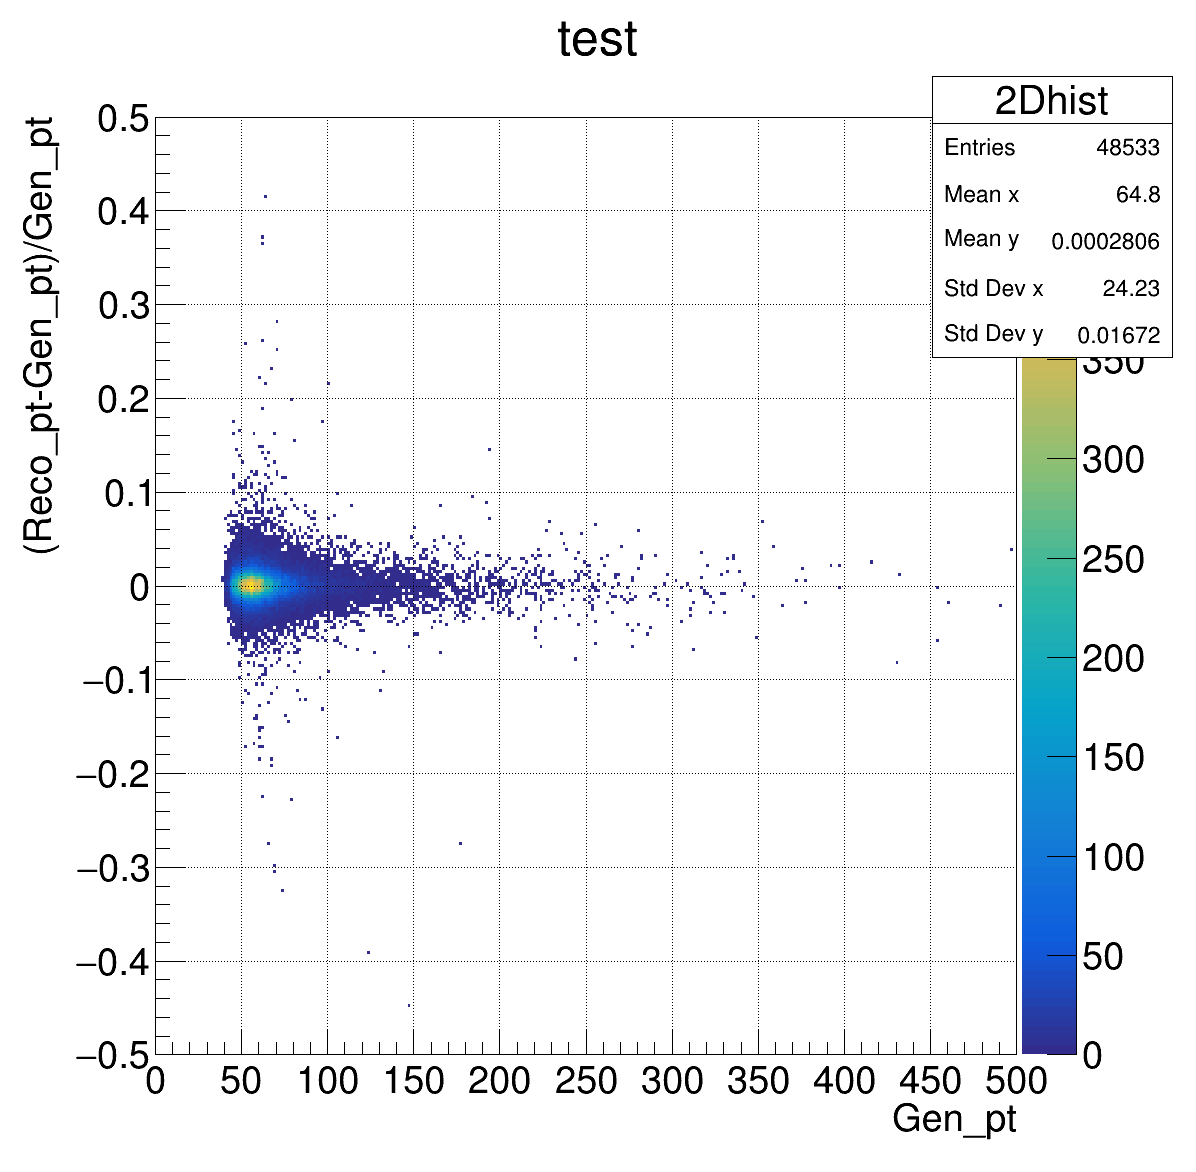

In [19]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 1200)

nbins, xlow, xhigh, ylow, yhigh = 300, 0, 500, -0.5, 0.5

var = "pt"
part = "D0"

h = rdf.Histo2D(("2Dhist", "test",\
                   nbins, xlow, xhigh, nbins, ylow, yhigh), "x2", "x1")

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()